In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

In [2]:
# VARIABILI
csvfile = '../csv/alldata.csv'
distance_param = 'CDistance'

# LETTURA DATI
tragitti = pd.read_csv(csvfile, index_col=False)

# PULIZIA DATI
pre_lock_cond = (tragitti['Month'] == 3) & (tragitti['Day'] <= 12)
post_lock_cond = ((tragitti['Month'] == 5) & (tragitti['Day'] >= 4)) | (tragitti['Month'] > 5)
distance_cond = tragitti[distance_param] != 0
moovit_cond = tragitti['Public'] > 20
public_cond = tragitti['Public'] != 0
bike_cond = tragitti['Bike'] != 0
foot_cond = tragitti['Foot'] != 0
car_cond = tragitti['Car'] != 0
car2go_cond = tragitti['Car2Go'] != 0
enjoy_cond = tragitti['Enjoy'] != 0
coherence_cond = (tragitti['Car'] < tragitti['Car2Go']) & (tragitti['Car'] < tragitti['Enjoy'])
cleaned = distance_cond & public_cond & bike_cond & foot_cond & car_cond & car2go_cond & enjoy_cond & coherence_cond

In [3]:
tragitti_public = tragitti[pre_lock_cond & moovit_cond & car_cond]
len(tragitti_public)

2050

In [4]:
public_vince = tragitti_public[tragitti_public['Public'] < tragitti_public['Car']]
len(public_vince)

23

In [5]:
public_vince[['ADistance', 'Month', 'Day', 'Hour', 'Minute', 'Public', 'Car', 'Public2']].head()

,ADistance,Month,Day,Hour,Minute,Public,Car,Public2
951,3.783128,3,2,16,29,24,26,27
953,5.671106,3,2,16,29,28,31,28
1089,6.190171,3,2,18,39,25,33,42
1520,4.106249,3,3,8,12,42,48,52
1525,5.307241,3,3,8,12,27,37,27


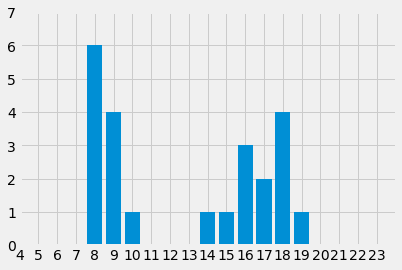

In [6]:
plt.bar(public_vince['Hour'].value_counts().sort_index().index, public_vince['Hour'].value_counts().sort_index().get_values())
plt.xticks(np.arange(4, 24, 1))
plt.yticks(np.arange(0, 8, 1))
plt.xlim((4, 24))
plt.show()

In [7]:
tragitti_bike = tragitti[pre_lock_cond & bike_cond & car_cond]
len(tragitti_bike)

8383

In [8]:
bike_vince = tragitti_bike[tragitti_bike['Bike'] < tragitti_bike['Car']]
len(bike_vince)

171

In [9]:
bike_vince[['ADistance', 'Month', 'Day', 'Hour', 'Minute', 'Bike', 'Car']].head()

,ADistance,Month,Day,Hour,Minute,Bike,Car
257,2.104432,3,1,16,24,14,15
272,2.226712,3,1,16,34,15,16
480,3.416010,3,2,8,39,23,27
485,2.252839,3,2,8,39,17,18
487,3.696357,3,2,8,39,27,29


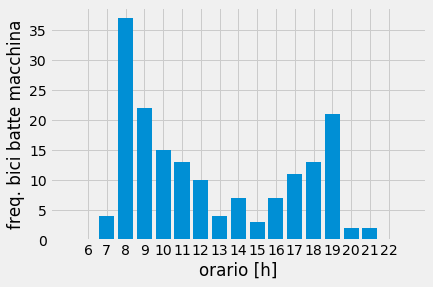

In [10]:
plt.bar(bike_vince['Hour'].value_counts().sort_index().index, bike_vince['Hour'].value_counts().sort_index().get_values())
plt.xticks(np.arange(6, 23, 1))
plt.yticks(np.arange(0, 40, 5))
plt.xlim((4, 24))
plt.xlabel('orario [h]')
plt.ylabel('freq. bici batte macchina')
plt.show()

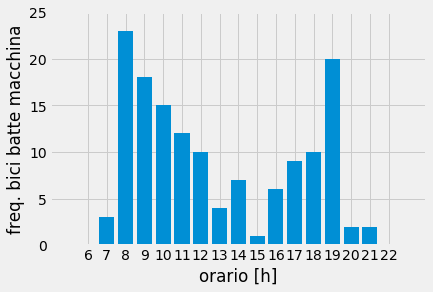

In [14]:
plt.bar(bike_vince[bike_vince['Bike'] <= 25]['Hour'].value_counts().sort_index().index, bike_vince[bike_vince['Bike'] <= 25]['Hour'].value_counts().sort_index().get_values())
plt.xticks(np.arange(6, 23, 1))
plt.yticks(np.arange(0, 30, 5))
plt.xlim((4, 24))
plt.xlabel('orario [h]')
plt.ylabel('freq. bici batte macchina')
plt.show()